# Dataset details:

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

This dataset include passenger information like name, age, gender, socio-economic class, etc. It contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

# import library & check the list of files in current directory

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visuallization
%matplotlib inline
import seaborn as sns


# For example, running this (by clicking run or pressing Shift+Enter) 
# will list all files under the input directory

import os
os.getcwd()  # outputs (for me) 'C:\\Users\\Dell\\OneDrive\\桌面\\titanic'

'C:\\Users\\Dell\\OneDrive\\桌面\\coursera\\IBM_machine_learning_cert\\Exploratory Data Analysis for Machine Learning\\assignment_titanic'

In [5]:
# show files of current directory

for dirname, _, filenames in os.walk(r'C:\\Users\\Dell\\OneDrive\\桌面\\titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# After importing, take a look on the data "train"

In [8]:
# import files & check out the details

train_raw = pd.read_csv('train.csv')
print(train_raw.shape)
print(train_raw.head())
print(train_raw.dtypes)

(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN    

There are 891 rows & 12 columns. While the type of these column are in numeric (number) & object (string). 

We will investigate the object columns to check if there are useful information for future Machine Learning prediction

# EDA on the object columns

In [9]:
# Subset object columns

obj_cols = train_raw.select_dtypes(include=object).columns.tolist()
train_raw_obj = train_raw[obj_cols]
print(obj_cols)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [10]:
# check the % of all values for each column including missing values 

for i in range(1,len(obj_cols)):
    print("number of column: {}".format(i))
    print(train_raw_obj[obj_cols[i]].value_counts(dropna=False))
    print(train_raw_obj[obj_cols[i]].value_counts(dropna=False,normalize=True))

number of column: 1
male      577
female    314
Name: Sex, dtype: int64
male      0.647587
female    0.352413
Name: Sex, dtype: float64
number of column: 2
CA. 2343         7
347082           7
1601             7
3101295          6
CA 2144          6
                ..
113056           1
SC/PARIS 2131    1
219533           1
376566           1
3101281          1
Name: Ticket, Length: 681, dtype: int64
CA. 2343         0.007856
347082           0.007856
1601             0.007856
3101295          0.006734
CA 2144          0.006734
                   ...   
113056           0.001122
SC/PARIS 2131    0.001122
219533           0.001122
376566           0.001122
3101281          0.001122
Name: Ticket, Length: 681, dtype: float64
number of column: 3
NaN            687
C23 C25 C27      4
B96 B98          4
G6               4
F33              3
              ... 
B37              1
D46              1
E17              1
D9               1
T                1
Name: Cabin, Length: 148, dtype: int64

By reading percentage, we can see that column "ticket" & "cabin" number are meaningless like "passenger ID" & "name" as its almost unique to each row. we can drop these above columns for future EDA.


In [11]:
train_raw_obj_selected = train_raw_obj.drop(['Ticket','Cabin', 'Name'], axis = 1)
print(train_raw_obj_selected.head())

      Sex Embarked
0    male        S
1  female        C
2  female        S
3  female        S
4    male        S


now only "sex" column remain

# we then undergo EDA on the numeric columns combining "sex" & "Embarked" columns

For "Embarked" column, we will do the One-hot encoding for their embarked location. For "Sex" column, we will change to 1/0 for male & female.

In [15]:
# Embarked column
train_raw = pd.get_dummies(train_raw, columns=["Embarked"])

# Sex column
sex_map = {'male': 1, 'female': 0}
train_raw['Sex_adj'] = train_raw['Sex'].map(sex_map)


In [23]:
train_select = train_raw.drop(['Sex', 'Ticket','Cabin', 'Name','PassengerId'], axis=1)

print(train_select.head())
print(train_select.dtypes)
print(train_select.describe())

   Survived  Pclass   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         0       3  22.0      1      0   7.2500           0           0   
1         1       1  38.0      1      0  71.2833           1           0   
2         1       3  26.0      0      0   7.9250           0           0   
3         1       1  35.0      1      0  53.1000           0           0   
4         0       3  35.0      0      0   8.0500           0           0   

   Embarked_S  Sex_adj  
0           1        1  
1           0        0  
2           1        0  
3           1        0  
4           1        1  
Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
Sex_adj         int64
dtype: object
         Survived      Pclass         Age       SibSp       Parch        Fare  \
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000 

we check the correlation if there are any collinearity such that we can further reduce features

In [49]:
# correlation
c = train_select.corr()
c = c.mask(np.tril(np.ones(c.shape)).astype(np.bool))
top_features = c[abs(c) >= 0.4].stack().reset_index()

print(top_features)

      level_0     level_1         0
0    Survived     Sex_adj -0.543351
1      Pclass        Fare -0.549500
2       SibSp       Parch  0.414838
3  Embarked_C  Embarked_S -0.778359
4  Embarked_Q  Embarked_S -0.496624


C:\Users\Dell\AppData\Local\Temp/ipykernel_16300/1968741250.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c = c.mask(np.tril(np.ones(c.shape)).astype(np.bool))


With filtering the high correlation pair of features, we find out that 
1. survival is highly depends on sex. 
2. Also, Pclass is highly correlated to Fare as higher price of ticket can enjoy a better class of seat in the ship. 
3. Also, with more siblings / spouse in the ship, the chance of having parents / childrens are higher. 

while the embarked-pairs are meaningless as only 1 embarked location for each row so we can ignore these.

# grouping aggregations of different features

We conduct a pairplot & go through the first column of the plot to see the difference of features between class

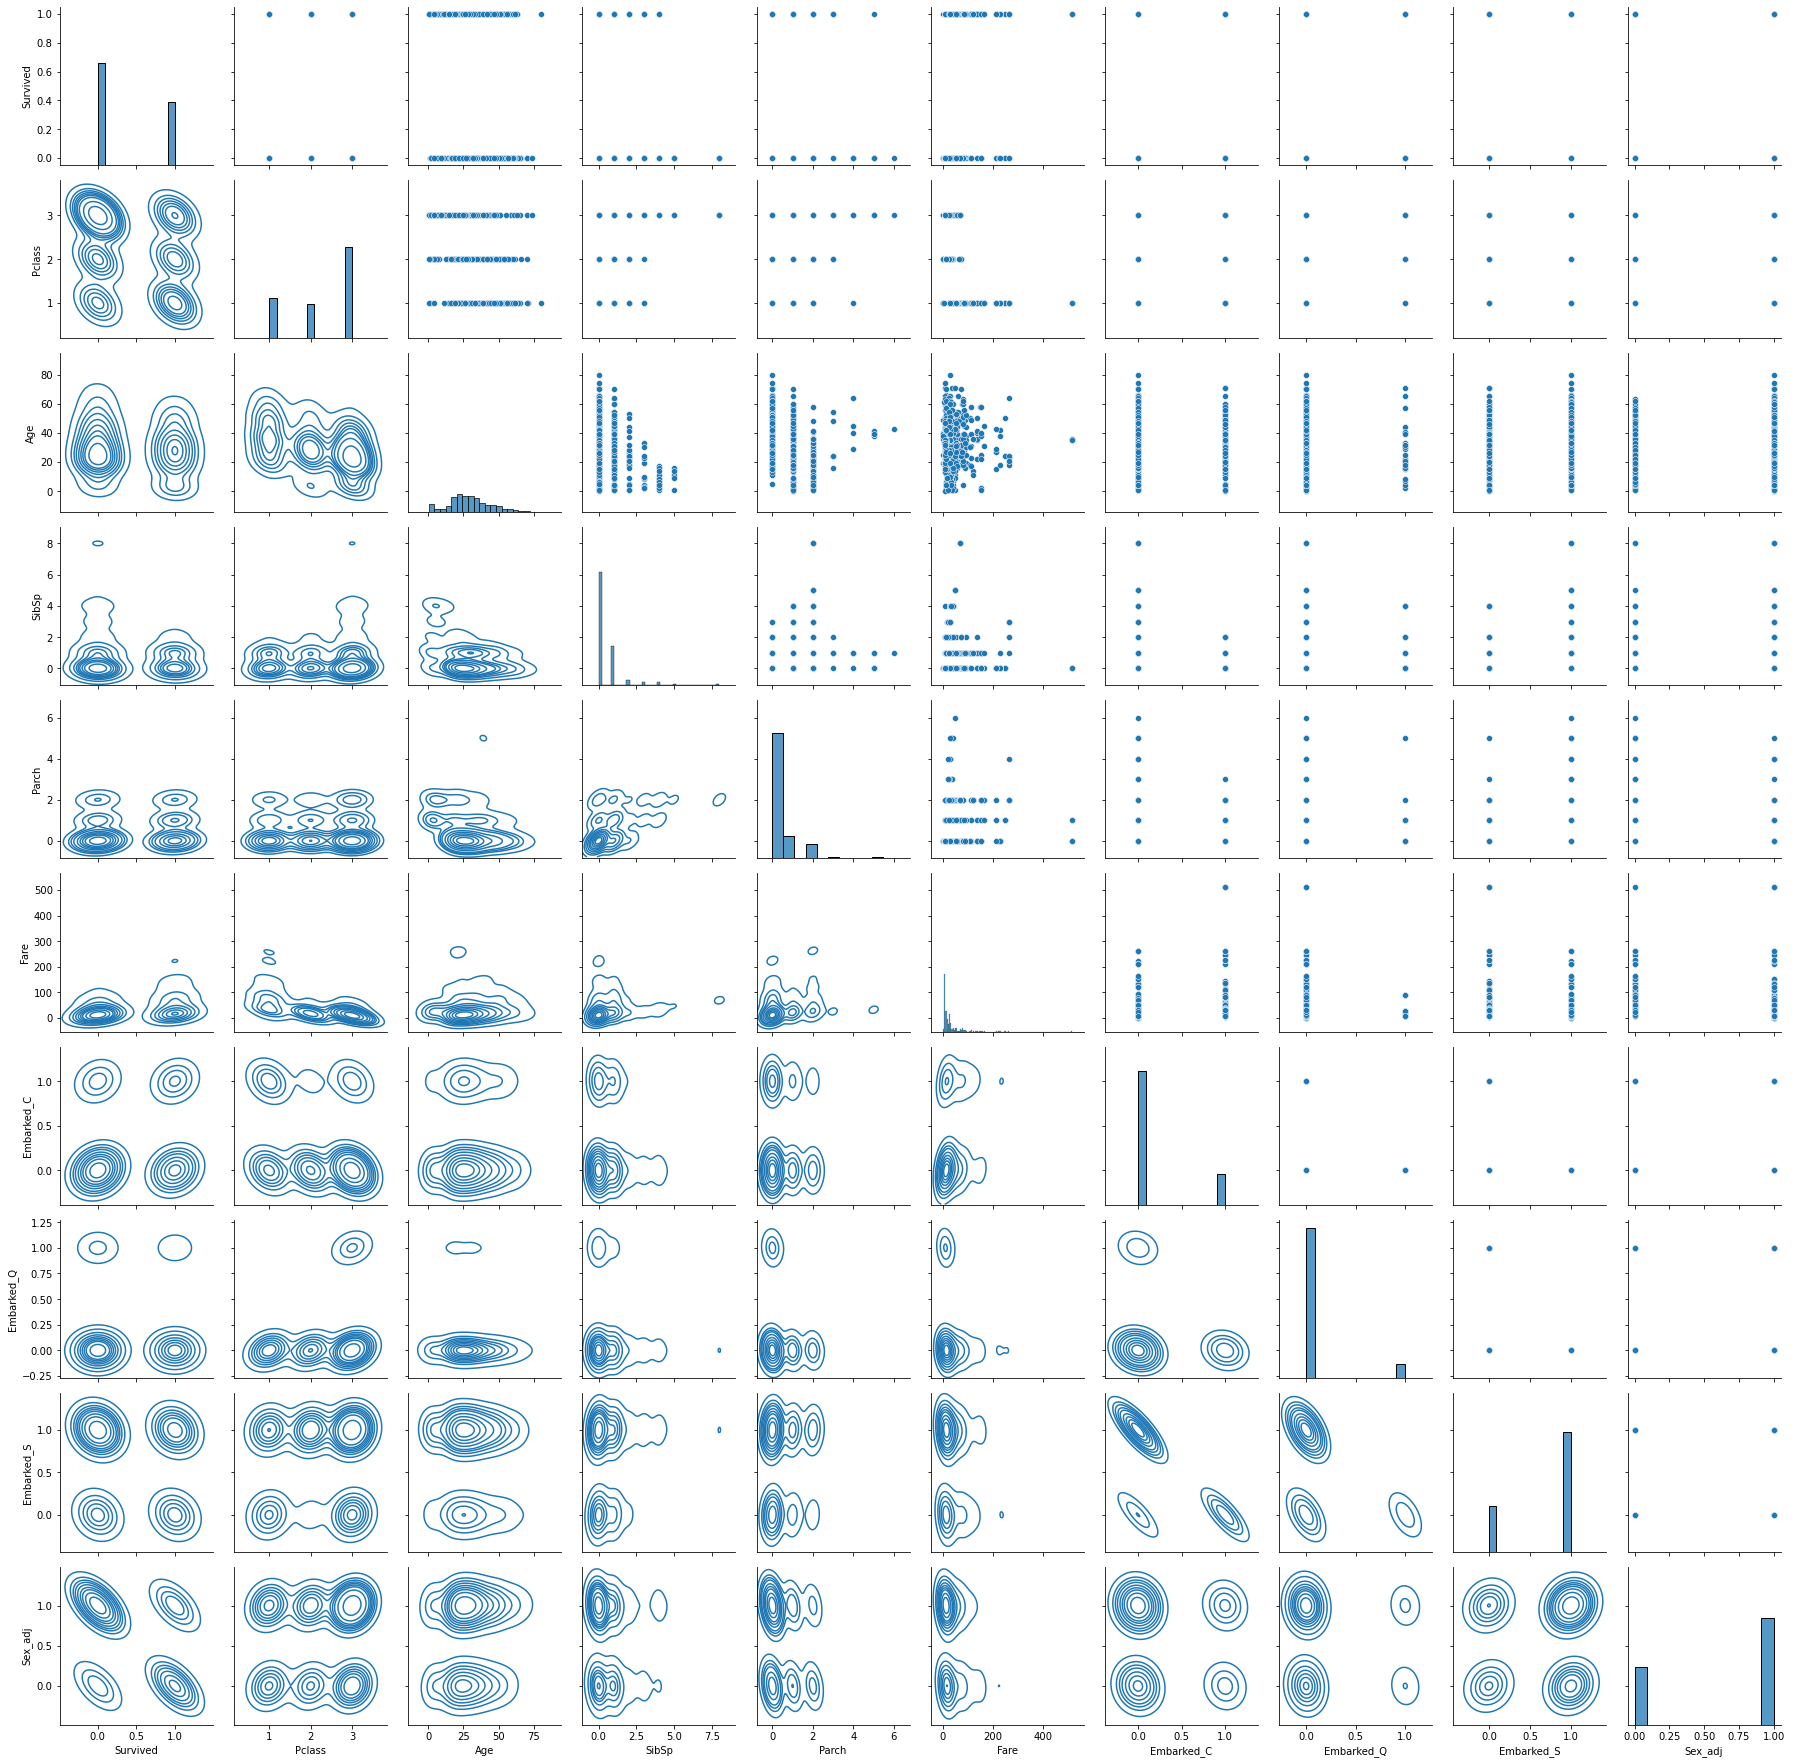

In [26]:
data = train_select
g = sns.PairGrid(data)
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.add_legend()

by looking at the first column, we see that the survived group are
1. more Pclass = 1 (upper class reflecting the socio-economic status),
2. more evenly-distributed age having the average around 30 years old.
3. more female.

Also, we can check out the group-mean & group-median.

In [32]:
# applying multiple functions at once - 2 methods

train_select.groupby('Survived').agg([np.mean, np.median])  # passing a list of explicit aggregation functions

Pclass               Age            SibSp            Parch         \
              mean median       mean median      mean median      mean median   
Survived                                                                        
0         2.531876      3  30.626179   28.0  0.553734      0  0.329690      0   
1         1.950292      2  28.343690   28.0  0.473684      0  0.464912      0   

               Fare        Embarked_C        Embarked_Q        Embarked_S  \
               mean median       mean median       mean median       mean   
Survived                                                                    
0         22.117887   10.5   0.136612      0   0.085610      0   0.777778   
1         48.395408   26.0   0.271930      0   0.087719      0   0.634503   

                  Sex_adj         
         median      mean median  
Survived                          
0             1  0.852459      1  
1             1  0.318713      0

By above chart, we can see that, compared non-survived group, the survived group are 
1. more Pclass = 1 (upper class reflecting the socio-economic status),
2. more evenly-distributed age having the average around 30 years old.
3. most significantly more female
4. less sibsp (siblings / spouses)
5. more parch (parents / children)
